# Regression Demo - Identifying Fish Toxicity
by Angie Shia



### We will use Linear regression model and Random Forest Regression model to demonstrate predicting a real value. The dataset used is a fish toxicity dataset donated to UCI online ML dataset in 2019.


Data Description:

This dataset was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. LC50 data, which is the concentration that causes death in 50% of test fish over a test duration of 96 hours, was used as model response. The model comprised 6 molecular descriptors: MLOGP (molecular properties), CIC0 (information indices), GATS1i (2D autocorrelations), NdssC (atom-type counts), NdsCH ((atom-type counts), SM1_Dz(Z) (2D matrix-based descriptors). Details can be found in the quoted reference: M. Cassotti, D. Ballabio, R. Todeschini, V. Consonni. A similarity-based QSAR model for predicting acute toxicity towards the fathead minnow (Pimephales promelas), SAR and QSAR in Environmental Research (2015), 26, 217-243; doi: 10.1080/1062936X.2015.1018938

6 Attributes (input parameters) with one quantitative response.

For more information on the dataset, seehttps://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity



In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
fish_df = pd.read_csv('qsar_fish_toxicity.csv',sep =';')
fish_df.head()

,CICO,SM1_Dz,GATS,NdsCh,NdssC,MLOGP,Qresponse
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [3]:
fish_df.describe()

,CICO,SM1_Dz,GATS,NdsCh,NdssC,MLOGP,Qresponse
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [4]:
#We now separate out the input parameters(features) from the target

input_param = fish_df[['CICO','SM1_Dz','GATS', 'NdsCh', 'NdssC', 'MLOGP']]
target = fish_df['Qresponse']

## Show heatmap, plots

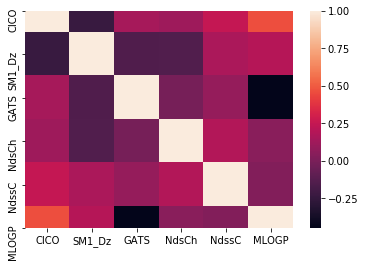

In [5]:
#We see the features are not heavily correlated. 
sns.heatmap(input_param.corr())

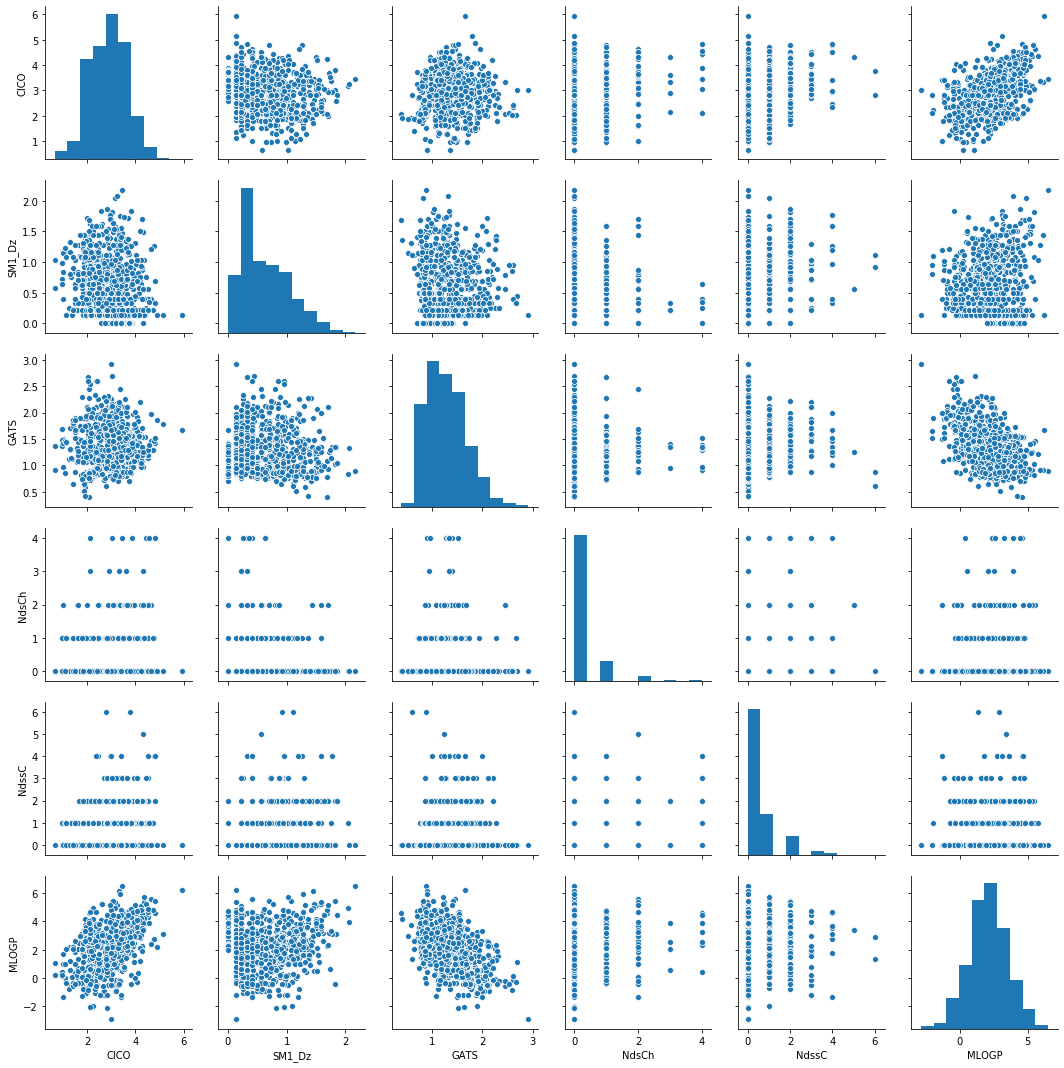

In [6]:
#We see some interesting plot wih NdsCh, NdssC as they have distinct values (categorical ?)
sns.pairplot(input_param)

## Training ML

In [7]:
from sklearn.model_selection import train_test_split

#since we have such as small sample size, we will keep only 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(input_param, target, test_size=0.2, random_state=101)

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

coeff_df = pd.DataFrame(lm.coef_,input_param.columns,columns=['Coefficient'])


#Interpreting this table
# The left column is the feature. The value in right means for each unit 
# increase in that feature, the Qresponse is increased by the amount stated in the coeff column
print(coeff_df)

#print(lm.intercept_)

        Coefficient
CICO       0.378839
SM1_Dz     1.228301
GATS      -0.689365
NdsCh      0.384385
NdssC      0.055318
MLOGP      0.397640


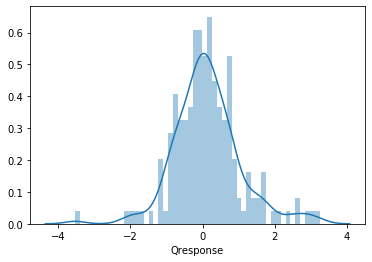

In [9]:
lm_predictions = lm.predict(X_test)
#plt.scatter(y_test,predictions)

#Residual histogram that shows our model's errors distribution
sns.distplot((y_test-lm_predictions),bins=50);


In [10]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))

MAE: 0.6646693501498407
RMSE: 0.9312148083234697


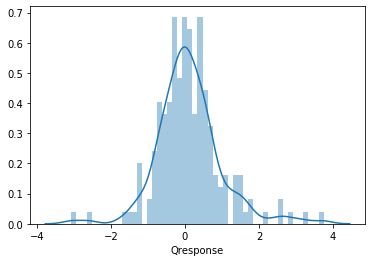

In [11]:
#Let's try a tree algorithm and see if it performs better than Linear model

from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, y_train)
rfr_prediction = rfr_model.predict(X_test)

sns.distplot((y_test-rfr_prediction),bins=50);


In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_prediction)))

MAE: 0.6199098638428115
RMSE: 0.8916663128788138
